<a href="https://colab.research.google.com/github/danielamador12/Projetos-Publicos/blob/master/Extra%C3%A7%C3%A3o_de_Tabela_de_um_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração de Tabela de um PDF
---
[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-danielamador12-darkblue.svg)](https://github.com/danielamador12)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkorange.svg)](https://medium.com/@daniel.s.amador)


![img](https://im0-tub-com.yandex.net/i?id=8136484eaf3f0bdb8e9d431e50643952&n=13)

Algumas dificuldades surgem no ambiente real de trabalho. Nem sempre conseguimos um arquivo ``.csv`` ou ``.xlsx``, mas se houver somente ``.pdf``?

Não é tão fácil, como por exemplo um *pd.read_pdf()* ou algo do tipo, mas... Estamos aqui para ajudar a fazer isso!

## Montando o Drive
Se estamos no ambiente do [Google Colab]('https://colab.research.google.com/notebooks/intro.ipynb#recent=true'), a primeira coisa que vamos fazer é montar o nosso drive, ou seja, fazer a conexão entre o notebook e o drive do Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PDFPLUMBER
O Pdf Plumber é uma biblioteca que facilita muito o trabalho de **extração de textos** de um PDF.

Por não vir diretamente no Colab é necessário instalar.

Saiba mais sobre a biblioteca [aqui](https://github.com/jsvine/pdfplumber).

In [ ]:
!pip install pdfplumber -q

## Importando as bibliotecas necessárias

In [ ]:
import pdfplumber
from os import chdir, getcwd, listdir
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import catplot
from seaborn import boxplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Iniciando os Trabalhos

**Inicialmente vamos visualizar em qual diretório estamos**

In [ ]:
getcwd()

'/content'

**Vamos mudar para o diretório onde está o nosso arquivo**

In [ ]:
chdir('/content/drive/My Drive/Colab Notebooks/Sigmoidal/Python do Zero/Módulo 02 - Manipulando Arquivos')

**Conferindo se realmente mudamos de diretório**

In [ ]:
getcwd()

'/content/drive/My Drive/Colab Notebooks/Sigmoidal/Python do Zero/Módulo 02 - Manipulando Arquivos'

**Vamos ver os arquivos que temos no nosso diretório?**

Vamos utilizar o 'VALOR POR BAIRRO.pdf'

Esse arquivo contém uma tabela com bairros da minha cidade e o valor arrecadado em reais para cada bairro por uma empresa alimentícia em um mês.

In [ ]:
listdir()

['Extraindo tabela de PDF.ipynb',
 'VALOR POR BAIRRO.pdf',
 'modelo_de_relatorio.pdf',
 'Google_Drive_e_Snippets_do_Colab.ipynb',
 'relatorios',
 'Sigmoidal - Inglês.pdf',
 'Biblioteca OS',
 'Booleanos e Operadores Lógicos',
 'Manipulando Arquivos PDF',
 'Strings',
 'Relatórios da Empresa',
 'pdf_fotos.pdf']

**Carregando o arquivo PDF**

In [ ]:
relatorio=pdfplumber.open('VALOR POR BAIRRO.pdf')

O atributo``.pages`` nos retorna o número de páginas de um pdf, neste caso temos somente uma página.

In [ ]:
relatorio.pages

[<Page:1>]

O atributo``.metadata`` nos retorna os metadados do arquivo, ou seja, as informações do arquivo.



In [ ]:
relatorio.metadata

{'CreationDate': "D:20200727165012-03'00'",
 'Creator': 'Writer',
 'Producer': 'LibreOffice 6.4'}

**O próximo passo**
Agora vamos acessar a primeira página do nosso arquivo e após isso extrair a tabela que se encontra nela.

Vamos colocá-lo na variável *rel_extract*.

In [ ]:
rel_extract=relatorio.pages[0].extract_tables(table_settings={})

**Vamos visualizar os arquivos extraidos**

In [ ]:
rel_extract

[[['', 'Bairro', 'Valor(R$)'],
  ['0', 'NOVA BETANIA', '4520.25'],
  ['1', 'CENTRO', '3248.53'],
  ['2', 'SANTO ANTONIO', '3182.50'],
  ['3', 'AEROPORTO', '3020.00'],
  ['4', 'PAREDOES', '2525.50'],
  ['5', 'BOA VISTA', '2164.25'],
  ['6', 'ALTO DO SAO MANOEL', '2099.25'],
  ['7', 'DOZE ANOS', '1968.25'],
  ['8', 'BELO HORIZONTE', '1587.00'],
  ['9', 'BARROCAS', '1434.75'],
  ['10', 'BOM JARDIM', '1099.50'],
  ['11', 'PLANALTO TREZE DE MAIO', '1093.25'],
  ['12', 'ALTO DO SUMARE', '968.00'],
  ['13', 'DIX SEPT ROSADO', '934.75'],
  ['14', 'ALTO DA CONCEICAO', '872.75'],
  ['15', 'ABOLICAO 1', '799.25'],
  ['16', 'ABOLICAO 4', '778.00'],
  ['17', 'LAGOA DO MATO', '577.75'],
  ['18', 'RINCAO', '558.00'],
  ['19', 'ABOLICAO 3', '548.00'],
  ['20', 'BELA VISTA', '513.25'],
  ['21', 'VINGT ROSADO', '512.00'],
  ['22', 'ABOLICAO', '511.50'],
  ['23', 'COSTA E SILVA', '451.00'],
  ['24', 'ABOLICAO 2', '345.50'],
  ['25', 'SANTA DELMIRA', '302.50'],
  ['26', 'REDENCAO', '302.25'],
  ['27', 'IL

**O que temos na verdade é uma lista de listas**

In [ ]:
print(rel_extract)

[[['', 'Bairro', 'Valor(R$)'], ['0', 'NOVA BETANIA', '4520.25'], ['1', 'CENTRO', '3248.53'], ['2', 'SANTO ANTONIO', '3182.50'], ['3', 'AEROPORTO', '3020.00'], ['4', 'PAREDOES', '2525.50'], ['5', 'BOA VISTA', '2164.25'], ['6', 'ALTO DO SAO MANOEL', '2099.25'], ['7', 'DOZE ANOS', '1968.25'], ['8', 'BELO HORIZONTE', '1587.00'], ['9', 'BARROCAS', '1434.75'], ['10', 'BOM JARDIM', '1099.50'], ['11', 'PLANALTO TREZE DE MAIO', '1093.25'], ['12', 'ALTO DO SUMARE', '968.00'], ['13', 'DIX SEPT ROSADO', '934.75'], ['14', 'ALTO DA CONCEICAO', '872.75'], ['15', 'ABOLICAO 1', '799.25'], ['16', 'ABOLICAO 4', '778.00'], ['17', 'LAGOA DO MATO', '577.75'], ['18', 'RINCAO', '558.00'], ['19', 'ABOLICAO 3', '548.00'], ['20', 'BELA VISTA', '513.25'], ['21', 'VINGT ROSADO', '512.00'], ['22', 'ABOLICAO', '511.50'], ['23', 'COSTA E SILVA', '451.00'], ['24', 'ABOLICAO 2', '345.50'], ['25', 'SANTA DELMIRA', '302.50'], ['26', 'REDENCAO', '302.25'], ['27', 'ILHA DE SANTA LUZIA', '249.25'], ['28', 'PINTOS', '233.00'

**Vamos acessar a primeira lista**

In [ ]:
rel_extract[0][0]

['', 'Bairro', 'Valor(R$)']

**Verificando todos os tipos de arquivos**

Veja que todos são listas.

In [ ]:
type(rel_extract),type(rel_extract[0]),type(rel_extract[0][0])

(list, list, list)

Se quiser, por exemplo, extrair o terceiro elemento na primeira lista, é assim que se faz:

In [ ]:
rel_extract[0][0][2]

'Valor(R$)'

Isso é útil para criarmos o **laço for** abaixo:

In [ ]:
bairro=[] # criando uma lista vazia
for i in range(44): # criando laço com 44 iterações
  bairro.append(rel_extract[0][i][1]) # para cada linha no arquivo original, acrescenta-se o nome do bairro à lista vazia bairro
# o código abaixo é análogo ao de cima
valor=[]
for i in range(44):
  valor.append(rel_extract[0][i][2])

No código acima, pegamos cada bairro e cada valor correspondente.

Abaixo iremos colocá-los em um DataFrame.

In [ ]:
df=pd.DataFrame(valor,bairro)
df

,0
Bairro,Valor(R$)
NOVA BETANIA,4520.25
CENTRO,3248.53
SANTO ANTONIO,3182.50
AEROPORTO,3020.00
PAREDOES,2525.50
BOA VISTA,2164.25
ALTO DO SAO MANOEL,2099.25
DOZE ANOS,1968.25
BELO HORIZONTE,1587.00


Perceba que acima o nome dos bairros são os índices e pode ficar assim para ser utilizado, mas não vamos deixar.

In [ ]:
# resetando indice
df.reset_index(inplace=True)
df

,index,0
0,Bairro,Valor(R$)
1,NOVA BETANIA,4520.25
2,CENTRO,3248.53
3,SANTO ANTONIO,3182.50
4,AEROPORTO,3020.00
5,PAREDOES,2525.50
6,BOA VISTA,2164.25
7,ALTO DO SAO MANOEL,2099.25
8,DOZE ANOS,1968.25
9,BELO HORIZONTE,1587.00


In [ ]:
# visualizando indice
df.index

RangeIndex(start=0, stop=44, step=1)

In [ ]:
# apagando a primeira linha onde ficaram os antigos indices
df.drop(0,axis=0,inplace=True)
df

,index,0
1,NOVA BETANIA,4520.25
2,CENTRO,3248.53
3,SANTO ANTONIO,3182.50
4,AEROPORTO,3020.00
5,PAREDOES,2525.50
6,BOA VISTA,2164.25
7,ALTO DO SAO MANOEL,2099.25
8,DOZE ANOS,1968.25
9,BELO HORIZONTE,1587.00
10,BARROCAS,1434.75


In [ ]:
# verificando os atuais nomes das colunas
df.columns

Index(['index', 0], dtype='object')

In [ ]:
# alterando os nomes das colunas
df.columns=['Bairro','Valor']
df

,Bairro,Valor
1,NOVA BETANIA,4520.25
2,CENTRO,3248.53
3,SANTO ANTONIO,3182.50
4,AEROPORTO,3020.00
5,PAREDOES,2525.50
6,BOA VISTA,2164.25
7,ALTO DO SAO MANOEL,2099.25
8,DOZE ANOS,1968.25
9,BELO HORIZONTE,1587.00
10,BARROCAS,1434.75


In [ ]:
# visualizando formato das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 43
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bairro  43 non-null     object
 1   Valor   43 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [ ]:
# transformando a coluna Valor em float
df.Valor=pd.to_numeric(df.Valor)

In [ ]:
# verificando novamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 43
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bairro  43 non-null     object 
 1   Valor   43 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


**Alguns atributos que podemos retirar**

São possíveis vários outros além desse.

In [ ]:
# máximo
df.Valor.max()

4520.25

In [ ]:
# mínimo
df.Valor.min()

27.0

In [ ]:
# soma
df.Valor.sum()

38550.03

In [ ]:
# mediana
df.Valor.median()

512.0

In [ ]:
# média
df.Valor.mean()

896.5123255813953

In [ ]:
# desvio padrão
df.Valor.std()

1072.5429560646915

## Plotando alguns gráficos
de muitos possíveis.

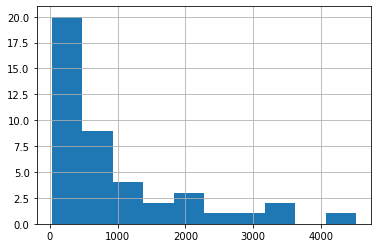

In [ ]:
# histograma
df.Valor.hist();

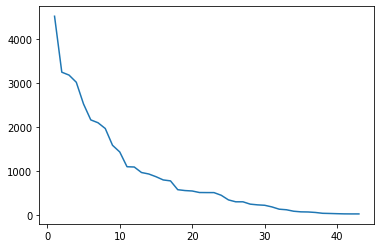

In [ ]:
# linhas
df.Valor.plot();

''

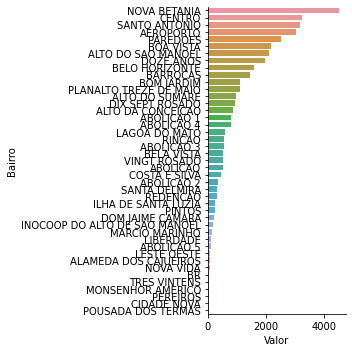

In [ ]:
# por categoria
catplot(x='Valor', y='Bairro', kind="bar", data=df)
;

In [ ]:
# boxplot
boxplot(x=df.Valor,orient='v');

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/danielamador12/Portfolio/blob/master/README.md).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-danielamador12-darkblue.svg)](https://github.com/danielamador12)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkorange.svg)](https://medium.com/@daniel.s.amador)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>